# Desvanecimento plano


## Manifestações do canal

As transmissões de ondas eletromagnéticas são principalmente afetadas por 2 diferentes fenômenos fisicos:

- **Reflexão:** Fenômeno fisico que ocorre quando uma onda eletromagetica colide com um objeto de larga dimensões superiores à seu comprimento de onda, sendo refletida sem percorrer seu caminho original.

- **Difração: ** Refere-se à vários fenômenos que ocorre quando o caminho de onda é obstruído entre transmissor e receptor por uma superficie com irregularidades ou pequenas aberturas. Como se dobrasse as ondas ao longo dos pequenos obstáculos espalhando-se.

Ambos são formas de interação da onda com o meio de propagação sendo sujeito também a perda de percurso mesmo em espaço livre.



A única caracteristica num canal wireless é o fenômeno chamado de desvanecimento, variação da amplitude do sinal no tempo e na frequência. Ao contrario do ruido aditivo, o desvanecimento é uma outra forma de atenuação do sinal caracterizada como disturbio não-aditivo. 


Existem basicamente duas caracteristicas de canais de radio que podemos descrever matematicamente. Um sinal chega ao receptor por vários caminhos de propagação, cada qual possui determinado atraso devido a diferença de percurso por diversas reflexões. A variação do sinal no tempo pode ocorrer tanto pela variação na proprio meio quanto pela variação relativa de posicionamento entre transmissor e receptor. Como resultado à tais variações, a resposta do canal varia com o tempo. 

Para obter uma descrição estatística do canal, considere a transmissão de uma onda portadora não modulada 
$$ s(t)= A \cdot cos(2 \pi f_{c} t) $$

O sinal recebido na ausência de ruído pode ser expresso da seguinte forma:

$$ x(t)= A \sum_{n} \alpha _{n}(t) \cdot cos[2 \pi f_{c} (t - \tau _{n}(t))] $$
$$ = A \cdot Re  \left [  \sum_{n} \alpha _{n}(t) e^{-j 2 \pi f_{c} \tau _{n}(t)} \cdot e^{j 2 \pi f_{c} t}  \right ]  $$
$$ = Re \left [c(t) \cdot e^{j 2 \pi f_{c} t}\right ] $$

Em que $ \alpha _{n} (t) $ é o fator de atenuação variante do tempo com o $n$ ésimo caminho e $\tau_{n}(t)$ corresponde ao atraso de tempo. O sinal de valor complexo:
$$c(t) = \sum_{n} \alpha _{n}(t) \cdot e^{-j 2 \pi f_{c} \tau _{n}(t)}   $$
$$ = \sum_{n} \alpha _{n}(t) \cdot e^{-j \phi _{n}(t)}   $$
representa a resposta do canal como uma exponencial complexa. Apesar de a entrada do sinal ser de uma frequencia só (sinal monocromático) a saida do canal consiste em um sinal que contém multiplas componentes de frequência, as quais foram gerada pelo resultado das variações do tempo na resposta do canal. 

O modelo de canal não seletivo na frequência ilustrado na figura abaixo aplica-se quando um sinal transmitido com largura de banda $W$ que tal que $W<< B_{cb}$. Outro caso ocorre quando o tempo de coerência $T_{ct}$ do canal é maior que a duração do sinal $T$ ($T_{ct}>> T$).


![Figura01](./handsOn11_matlab_figs/desvanecimento_plano.png)





O valor complexo do ganho do canal pode ser expressado da seguinte forma:


$$  c(t)= c_{r}(t)+jc_{i}(t) =\alpha(t) \cdot e^{j\phi(t)} $$
em que
$$\alpha(t)=\sqrt{c_{r}^{2}(t)+c_{i}^{2}(t)} $$
$$ \phi(t)=arctan \left ( \frac{c_{i}}{c_{r}} \right ) $$

quando c(t) consiste em uma série de componentes de multipercurso tendo amplitudes aleatórias e fases uniformemente distribuidas, as duas componentes $c_{r}(t)$ e  $c_{i}(t)$ são modelados geralmente com média zero. Portanto, $\alpha (t)$ é caracterizado estatisticamente como uma distribuição de probabilidade do tipo Rayleigh e $\phi (t)$ é unifromemente distribuido num intervalo de $(0,2\pi)$. Como consequência, o canal é chamado de Rayleigh Fading channel. A amplitude do sinal de desvanecimento de Rayleigh é descrita pela seguinte equação:

$$f(\alpha)=\frac {\alpha^{2}}{\sigma^{2}} \cdot  e^{\frac{-\alpha^{2}}{\sigma^{2}}}$$ Para
$$\alpha \geq 0 $$

Sendo $f(\alpha)=0$ para $\alpha < 0 $. Calcula-se o parâmetro $\sigma^{2}=E(c_{r}^{2})=E(c_{i}^{2})$.







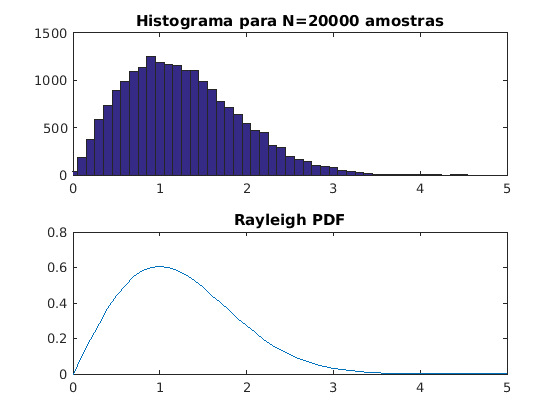

In [2]:
% Rayleigh.m
clc; clear all;close all;
%% Parâmetros
N=20000;                                    % Número de amostras
x=0:0.1:5;                                  % Eixo x
sigma=1;                                    % Parâmetro Rayleigh
u=rand(1,N);                                % Amostras aleatórias
r=sigma*sqrt(-2*log(u));                    % Dados aleatorios da distribuição Rayleigh
r_ac= x/(sigma^2).*exp(-(x/sigma).^2/2);    % Rayleigh PDF

%% plotting
subplot(2,1,1)
hist(r,x)
title('Histograma para N=20000 amostras')
axis([0 5 0 1500])
subplot(2,1,2)
plot(x,r_ac)
title('Rayleigh PDF')

Em sistemas wireless, existem duas formas de comportamento do meio as quais influenciam diretamente na recepção do sinal. A primeira é a LOS(Line-of-Sight) caracterizada pela ligação direta da antena transmissora com a antena receptora. Neste caso a função densidade de probabilidade do sinal recebido em relação aos seus atrasos é da forma RICE (Rician).
![Figura02](./handsOn11_matlab_figs/LOS.png)
Sua caracteristica principal é que existe componentes com intensidade muito maior que a maioria das outras componentes.

A segunda é a NLOS (Non-Line-of-Sight) caracterizada pela ausencia de componentes fortes devido ao sombreamento causado por algum objeto de dimensões maior que o comprimento de onda do sinal transmitido que intercepta o caminho da onda. 
![Figura03](./handsOn11_matlab_figs/NLOS.png)
Devido as reflexões dos sinaisa função densidade de probabilidade do sinal recebido em relação aos seus atrasos é da forma Rayleigh. Isso 
Se alguma componente de dispersão é muito mais fortes que as outras componentes, o gráfico de dispersão deixa de ser Rayleigh e passa a se comportar como uma distribuição tipo Rice (Rician), sendo então caracterizado desvanescimento Rice.

O sinal recebido é resultado da soma de todos os infinitos sinais refletidos do meio.


Pelo teorema do limite central, o sinal recebido pode ser representado por uma variável Gausiana complexa, de tal forma que $W=W_{1}+W_{2}$ sendo componente real e complexas independentes entre si. Essas variaveis gaussianas variam de meio para meio cuja média é sempre zero e uma variância de $\sigma^{2}$. De tal forma que 

.
.
.
.
.


